
<a id='schelling'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Schelling’s Segregation Model


<a id='index-1'></a>

## Contents

- [Schelling’s Segregation Model](#Schelling’s-Segregation-Model)  
  - [Overview](#Overview)  
  - [The Model](#The-Model)  
  - [Results](#Results)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

## Overview

In 1969, Thomas C. Schelling developed a simple but striking model of racial segregation [[Sch69]](zreferences.html#schelling1969)

His model studies the dynamics of racially mixed neighborhoods

Like much of Schelling’s work, the model shows how local interactions can lead to surprising aggregate structure

In particular, it shows that relatively mild preference for neighbors of similar race can lead in aggregate to the collapse of mixed neighborhoods, and high levels of segregation

In recognition of this and other research, Schelling was awarded the 2005 Nobel Prize in Economic Sciences (joint with Robert Aumann)

In this lecture we (in fact you) will build and run a version of Schelling’s model

## The Model

We will cover a variation of Schelling’s model that is easy to program and captures the main idea

Suppose we have two types of people: orange people and green people

For the purpose of this lecture, we will assume there are 250 of each type

These agents all live on a single unit square

The location of an agent is just a point $ (x, y) $,  where $ 0 < x, y < 1 $

### Preferences

We will say that an agent is *happy* if half or more of her 10 nearest neighbors are of the same type

Here ‘nearest’ is in terms of [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)

An agent who is not happy is called *unhappy*

An important point here is that agents are not averse to living in mixed areas

They are perfectly happy if half their neighbors are of the other color

### Behavior

Initially, agents are mixed together (integrated)

In particular, the initial location of each agent is an independent draw from a bivariate uniform distribution on $ S = (0, 1)^2 $

Now, cycling through the set of all agents, each agent is now given the chance to stay or move

We assume that each agent will stay put if they are happy and move if unhappy

The algorithm for moving is as follows

1. Draw a random location in $ S $  
1. If happy at new location, move there  
1. Else, go to step 1  


In this way, we cycle continuously through the agents, moving as required

We continue to cycle until no one wishes to move

## Results

Let’s have a look at the results we got when we coded and ran this model

As discussed above, agents are initially mixed randomly together

<img src="_static/figures/schelling_fig1.png" style="">

  
But after several cycles they become segregated into distinct regions

<img src="_static/figures/schelling_fig2.png" style="">

  
<img src="_static/figures/schelling_fig3.png" style="">

  
<img src="_static/figures/schelling_fig4.png" style="">

  
In this instance, the program terminated after 4 cycles through the set of
agents, indicating that all agents had reached a state of happiness

What is striking about the pictures is how rapidly racial integration breaks down

This is despite the fact that people in the model don’t actually mind living mixed with the other type

Even with these preferences, the outcome is a high degree of segregation

## Exercises


<a id='schelling-ex1'></a>

### Exercise 1

Implement and run this simulation for yourself

Use 250 agents of each type

## Solutions

### Exercise 1

Here’s one solution that does the job we want. If you feel like a
further exercise you can probably speed up some of the computations and
then increase the number of agents.

### Setup

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.1.0")

In [2]:
using Parameters, Plots, LinearAlgebra, Statistics, Compat
gr(fmt = :png);

In [3]:
Agent = @with_kw (kind, location = rand(2))

draw_location!(a) = a.location .= rand(2)

# distance is just 2 norm: uses our subtraction function
get_distance(a, agent) = norm(a.location - agent.location)

function is_happy(a)
    distances = [(get_distance(a, agent), agent) for agent in agents]
    sort!(distances)
    neighbors = [agent for (d, agent) in distances[1:neighborhood_size]]
    share = mean(isequal(a.kind), other.kind for other in neighbors)

    # can also do
    # share = mean(isequal(a.kind),
    #              first(agents[idx]) for idx in
    #              partialsortperm(get_distance.(Ref(a), agents),
    #                              1:neighborhood_size))

    return share ≥ preference
end

function update!(a)
    # If not happy, then randomly choose new locations until happy.
    while !is_happy(a)
        draw_location!(a)
    end
end

function plot_distribution(agents)
    x_vals_0, y_vals_0 = zeros(0), zeros(0)
    x_vals_1, y_vals_1 = zeros(0), zeros(0)

    # obtain locations of each type
    for agent in agents
        x, y = agent.location
        if agent.kind == 0
            push!(x_vals_0, x)
            push!(y_vals_0, y)
        else
            push!(x_vals_1, x)
            push!(y_vals_1, y)
        end
    end

    p = scatter(x_vals_0, y_vals_0, color = :orange, markersize = 8, alpha = 0.6)
    scatter!(x_vals_1, y_vals_1, color = :green, markersize = 8, alpha = 0.6)
    return plot!(legend = :none)
end

plot_distribution (generic function with 1 method)

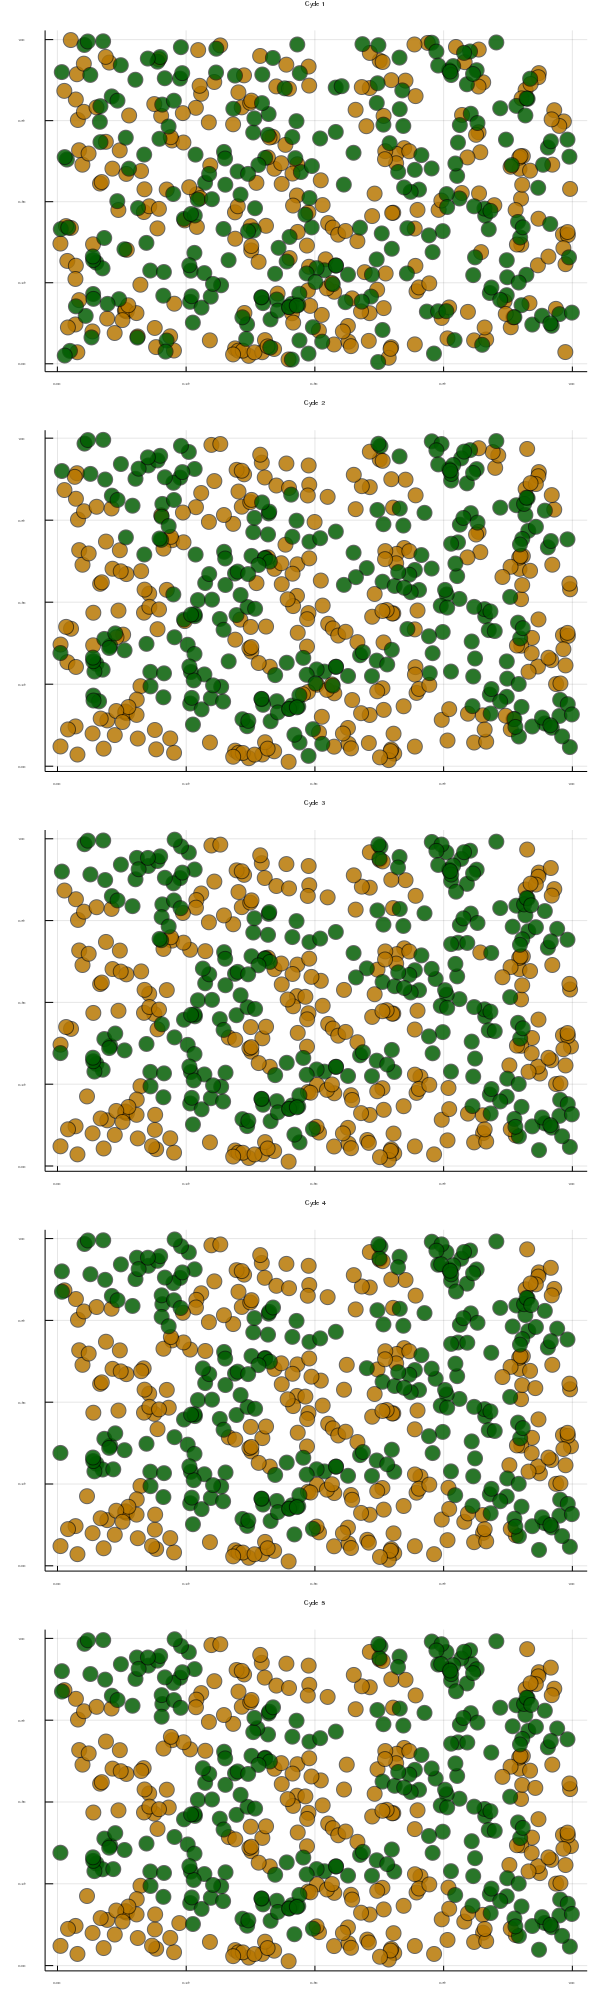

In [4]:
num_of_type_0 = 250
num_of_type_1 = 250
neighborhood_size = 10 # Number of agents regarded as neighbors
preference = 0.5 # Want their kind to make at least this share of the neighborhood

# Create a list of agents
agents = vcat([Agent(kind = 0) for i in 1:num_of_type_0],
              [Agent(kind = 1) for i in 1:num_of_type_1])

plot_array = Any[]

# loop until none wishes to move
while true
    push!(plot_array, plot_distribution(agents))
    no_one_moved = true
    for agent in agents
        old_location = copy(agent.location)
        update!(agent)
        if norm(old_location - agent.location) ≉ 0
            no_one_moved = false
        end
    end
    if no_one_moved
        break
    end
end
n = length(plot_array)
plot(plot_array...,
     layout = (n, 1),
     size = (600, 400n),
     title = reshape(["Cycle $i" for i in 1:n], 1, n))